<a href="https://colab.research.google.com/github/DawidK4/MyNotebooks/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = '/content/drive/MyDrive/'

df_train = pd.read_csv(path + 'mnist_train.csv', header=None)
df_test = pd.read_csv(path + 'mnist_test.csv', header=None)

df_train.shape

MessageError: Error: credential propagation was unsuccessful

In [ ]:
column_names = ['class'] + [f'pixel{i}' for i in range(1, 785)]

df_train.columns = column_names
df_test.columns = column_names

df_train.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0]

print(X_train.shape)
print(X_test.shape)

(59999, 784)
(9999, 784)


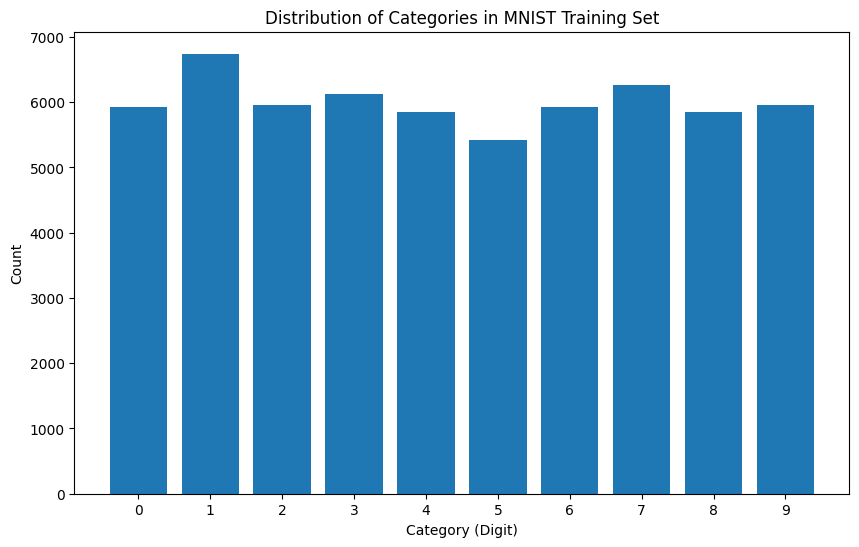

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts for each category in the training set
category_counts = df_train['class'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Categories in MNIST Training Set')
plt.xlabel('Category (Digit)')
plt.ylabel('Count')
plt.xticks(category_counts.index)
plt.show()

Task 2

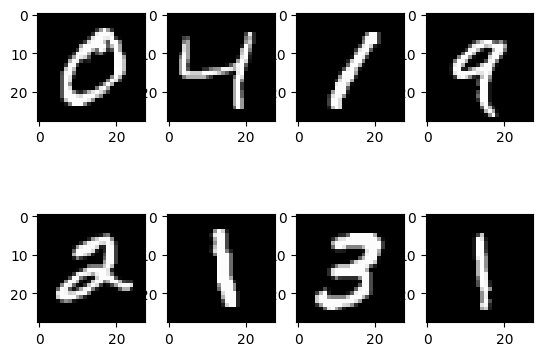

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(8):
     # define subplot
    plt.subplot(240+1+i)
    # plot raw pixel data
    ith_image = X_train.iloc[i,:]
    ith_image_arr = ith_image.to_numpy()
    ith_image= ith_image_arr.reshape(28,28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Task 3.1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_train.drop('class', axis=1)
y = df_train['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

Accuracy on validation set: 0.868


Task 3.2
1. Gini Impurity

Focus: Measures the probability of misclassifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset.
Goal: To minimize Gini impurity, meaning to create splits that result in the purest possible nodes (nodes containing mostly data points from a single class).
Calculation: Calculated as:

Gini = 1 - Σ (pi)^2
Use code with caution
where pi is the proportion of samples belonging to class i in the node.

Interpretation: A Gini impurity of 0 means the node is perfectly pure (all samples belong to the same class). Higher values indicate more impurity.

2. Entropy

Focus: Measures the uncertainty or randomness in the data at a node.
Goal: To minimize entropy, which means to create splits that result in the most information gain (reducing the uncertainty about the class labels).
Calculation: Calculated as:

Entropy = - Σ (pi) * log2(pi)
Use code with caution
where pi is the proportion of samples belonging to class i in the node.

Interpretation: An entropy of 0 means the node is perfectly pure. Higher values indicate more uncertainty.
3. Log Loss (Cross-Entropy Loss)

Focus: Measures the performance of a classification model where the prediction input is a probability value between 0 and 1.
Goal: To minimize log loss, which means to create splits that result in the most accurate probability estimates for each class.
Calculation:

Log Loss = - (1/N) Σ [yi * log(pi) + (1 - yi) * log(1 - pi)]
Use code with caution
where N is the number of samples, yi is the true label (0 or 1), and pi is the predicted probability for class 1.

Interpretation: Lower log loss values indicate better model performance.


In [ ]:
best_accuracy = 0
best_params = {}

for max_depth in [30]:
    for criterion in ['gini', 'entropy', 'log_loss']:
        classifier = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'max_depth': max_depth, 'criterion': criterion}

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: {best_params}")

Best accuracy: 0.8709166666666667
Best parameters: {'max_depth': 30, 'criterion': 'entropy'}


Task 4

RandomForestClassifier is a model that combines multiple decision trees for improved accuracy. Each tree is trained on a different subset of data and features, and predictions are made by majority voting. This ensemble approach reduces overfitting and makes it robust to outliers.

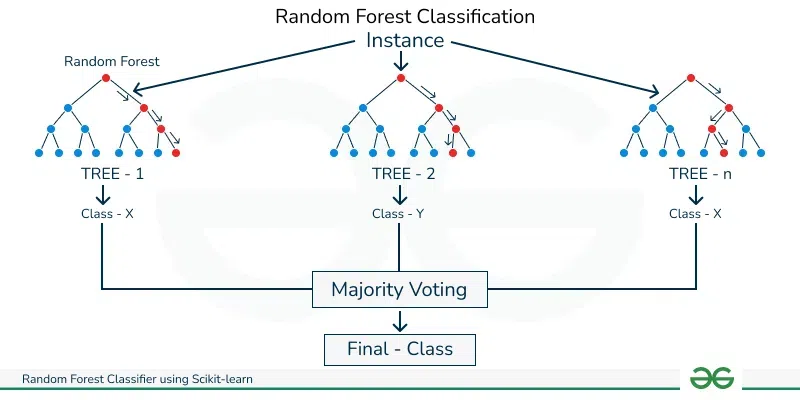

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_score}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy: 0.9641659330833073
Accuracy on validation set: 0.9638333333333333


Task 5

ExtraTreesClassifier is an ensemble model like Random Forest but with more randomness. It randomly chooses split points for features instead of searching for the best split, making it faster and less prone to overfitting. This often results in comparable or even better accuracy than Random Forest.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_score}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

Best parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy: 0.965853456957322
Accuracy on validation set: 0.9669166666666666


Task 6

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm known for its high accuracy and efficiency. It's a gradient boosting algorithm, meaning it builds a model by sequentially adding weak learners (typically decision trees) to improve the overall model's performance.

Here's a breakdown:

Boosting: XGBoost uses a technique called boosting, where it iteratively trains new models to correct the errors made by previous models. Each new model focuses on the data points that were misclassified by the previous models.
Gradient Descent: It uses gradient descent optimization to minimize a loss function, which measures the difference between the model's predictions and the actual values. This helps the model learn from its mistakes and gradually improve its accuracy.
Regularization: XGBoost includes regularization techniques to prevent overfitting, which means the model performs well on the training data but poorly on unseen data. Regularization helps the model generalize better to new data.

In [ ]:
!pip install xgboost
import xgboost as xgb

param_grid = {
    'n_estimators': [300],
    'max_depth': [7],
    'learning_rate': [0.01],
    'subsample': [0.9],
    'colsample_bytree': [0.9]
}

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_score}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best accuracy: 0.9519156552765912
Accuracy on validation set: 0.9514166666666667


Task 7


In [ ]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

# Create augmented data
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    image = X_train.iloc[i].values
    label = y_train.iloc[i]

    X_train_augmented.append(image)  # Original image
    y_train_augmented.append(label)

    for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]: # Shift directions
        shifted_image = shift_image(image, dx, dy)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)

X_train_augmented = pd.DataFrame(X_train_augmented, columns=X_train.columns)
y_train_augmented = pd.Series(y_train_augmented, name='class')

<ipython-input-26-9e358d4d6d8e>:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


Task 8

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

X_train_augmented = []
y_train_augmented = []
X = df_train.drop('class', axis=1)
y = df_train['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


for i in range(len(X_train)):
    image = X_train.iloc[i].values
    label = y_train.iloc[i]

    X_train_augmented.append(image)
    y_train_augmented.append(label)

    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        shifted_image = shift_image(image, dx, dy)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)

X_train_augmented = pd.DataFrame(X_train_augmented, columns=X_train.columns)
y_train_augmented = pd.Series(y_train_augmented, name='class')

<ipython-input-28-6022c03e69bd>:7: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


Task 9

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(f"Training time: {training_time:.2f} seconds")
    print(f"Accuracy on validation set: {accuracy}")

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    train_and_evaluate(model, X_train_augmented, y_train_augmented, X_val, y_val)


Training Decision Tree...
Training time: 88.80 seconds
Accuracy on validation set: 0.90875

Training Random Forest...
Training time: 200.94 seconds
Accuracy on validation set: 0.9775833333333334

Training Extra Trees...
Training time: 175.97 seconds
Accuracy on validation set: 0.9788333333333333

Training XGBoost...
Training time: 174.57 seconds
Accuracy on validation set: 0.9825833333333334


Wniosek: Augumentacja poprawiła precyzję.